<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [3]:
import sqlite3

conn = sqlite3.connect('survey-results-public.sqlite')

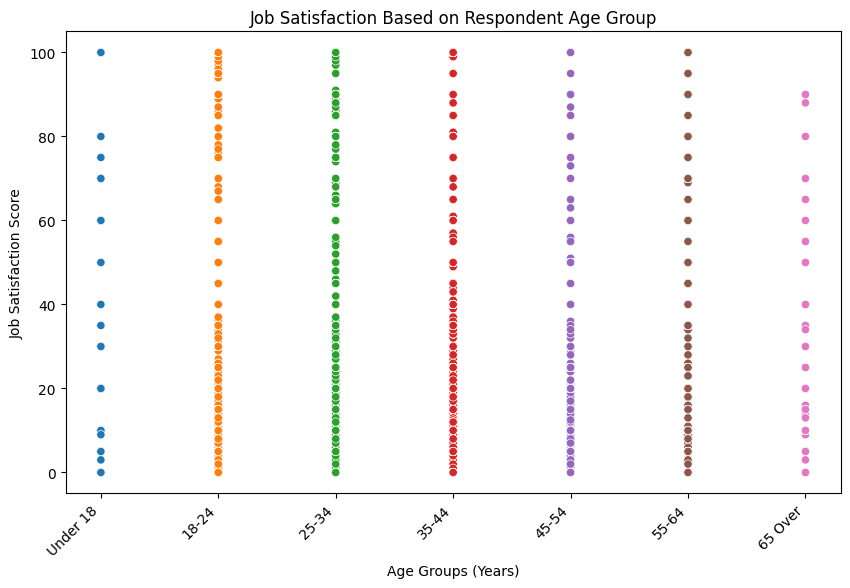

In [4]:
## Write your code here
# Pulling data
query = '''
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning data
mapping_age_group = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}
df['Age'] = df.loc[:,'Age'].map(mapping_age_group)
df.dropna(subset=['Age'], inplace=True)
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df['Age'] = pd.Categorical(df['Age'], categories=age_groups, ordered=True)

# Plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='JobSatPoints_6', hue='Age', legend=None)
plt.title('Job Satisfaction Based on Respondent Age Group')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Job Satisfaction Score')
plt.xticks(ticks=range(len(age_groups)), labels=age_groups,
           rotation=45, ha='right')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


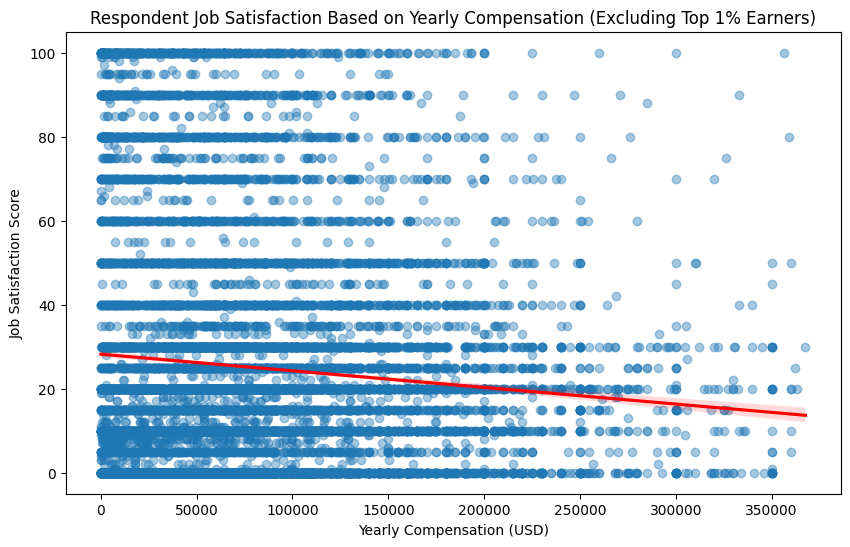

In [5]:
## Write your code here
# Pulling Data
query = '''
SELECT ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]


# Plotting Data
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', scatter=True, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Respondent Job Satisfaction Based on Yearly Compensation (Excluding Top 1% Earners)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


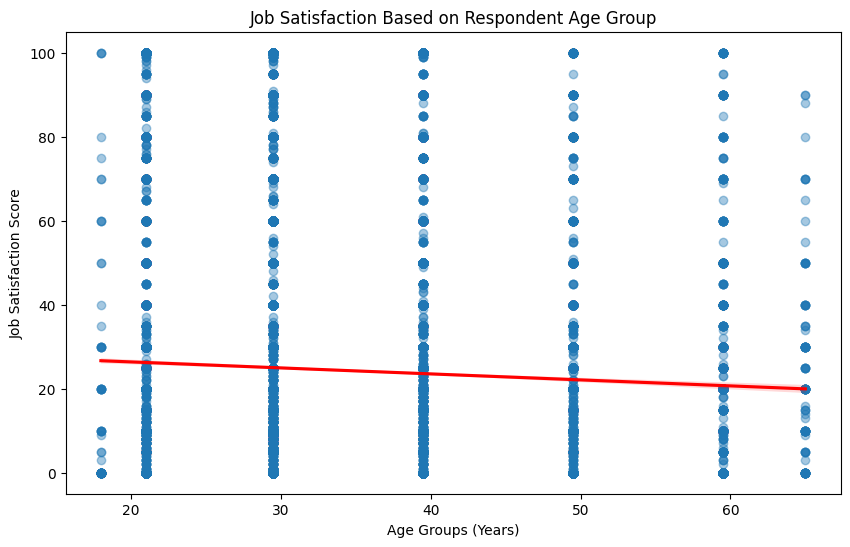

In [6]:
## Write your code here
# Pulling data
query = '''
SELECT Age, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning data
mapping_age_year = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}
df['Age'] = df.loc[:,'Age'].map(mapping_age_year)
df.dropna(subset=['Age'], inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Plotting
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Age', y='JobSatPoints_6', scatter=True, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Job Satisfaction Based on Respondent Age Group')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


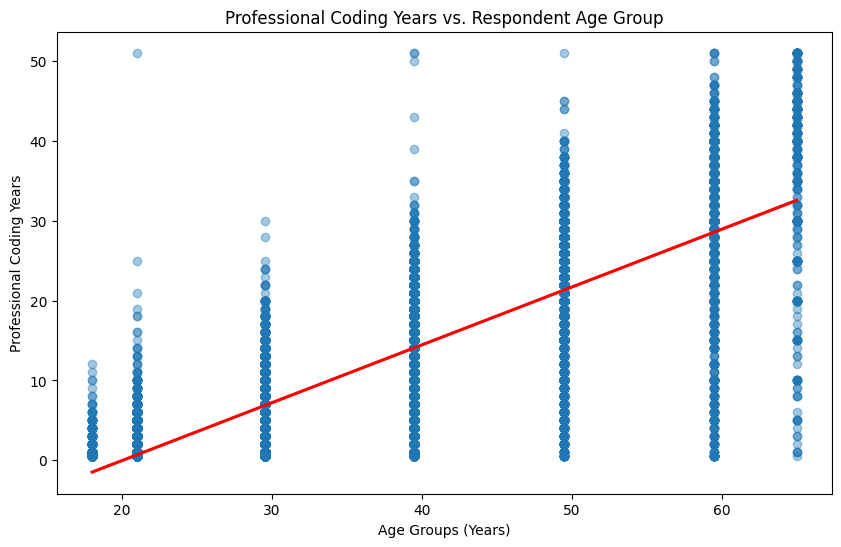

In [7]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, YearsCodePro
FROM main
WHERE Age IS NOT NULL
AND YearsCodePro IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Cleaning Data
df['Age'] = df.loc[:,'Age'].map(mapping_age_year)
df['YearsCodePro'] = df.loc[:,'YearsCodePro'].replace(mapping_codeyears)
df.dropna(subset=['Age'], inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plotting Data
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='Age', y='YearsCodePro', scatter=True, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Professional Coding Years vs. Respondent Age Group')
plt.xlabel('Age Groups (Years)')
plt.ylabel('Professional Coding Years')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


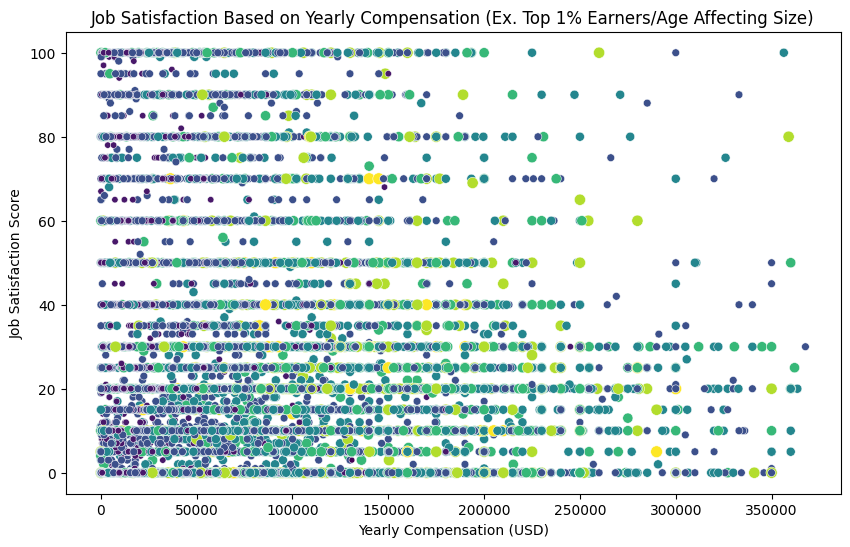

In [8]:
## Write your code here
# Pulling Data
query = '''
SELECT ConvertedCompYearly, JobSatPoints_6, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
AND Age IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df.loc[:,'Age'].map(mapping_age_year)
df.dropna(subset=['Age'], inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]


# Plotting Data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6',
                size='Age', hue='Age', palette='viridis', legend=None)
plt.title('Job Satisfaction Based on Yearly Compensation (Ex. Top 1% Earners/Age Affecting Size)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


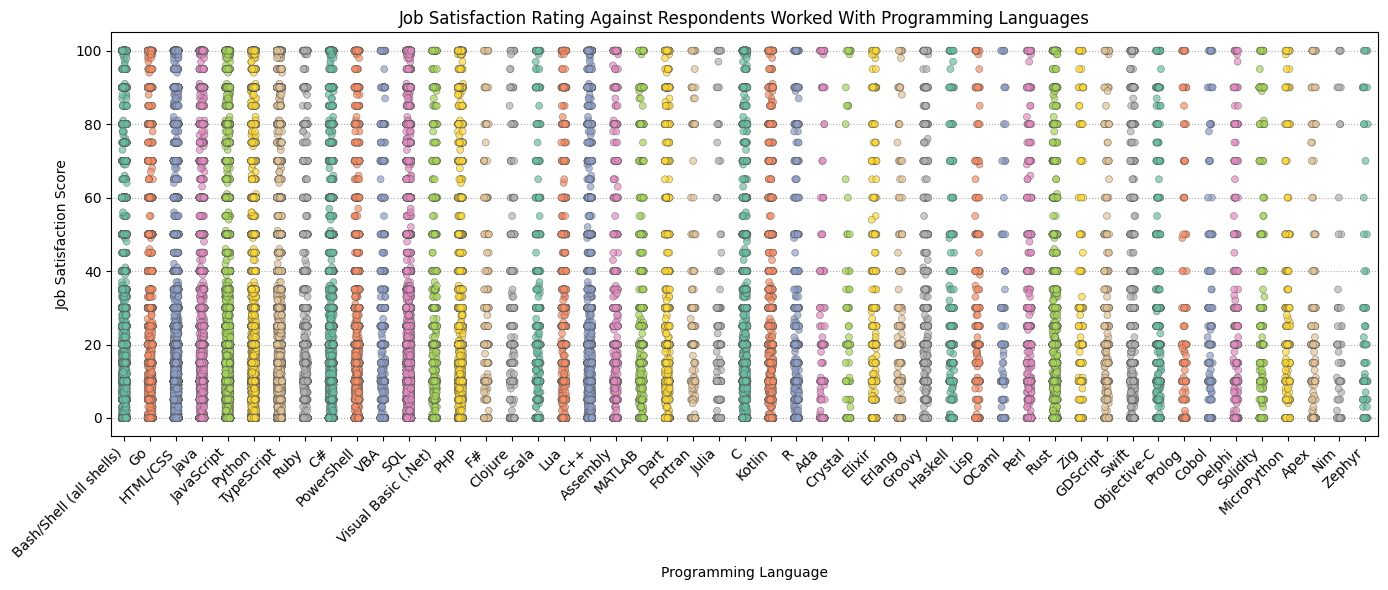

In [9]:
## Write your code here
# Pulling Data
query = '''
SELECT LanguageHaveWorkedWith, JobSatPoints_6
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()

plt.figure(figsize=(14, 6))
sns.stripplot(data=df_exploded, x='LanguageList', y='JobSatPoints_6',
              palette='Set2', legend=False, hue='LanguageList', jitter=True,
              alpha=0.7, linewidth=0.4
)
plt.title('Job Satisfaction Rating Against Respondents Worked With Programming Languages')
plt.ylabel('Job Satisfaction Score')
plt.xlabel('Programming Language')
plt.grid(True, axis='y', linestyle=':', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


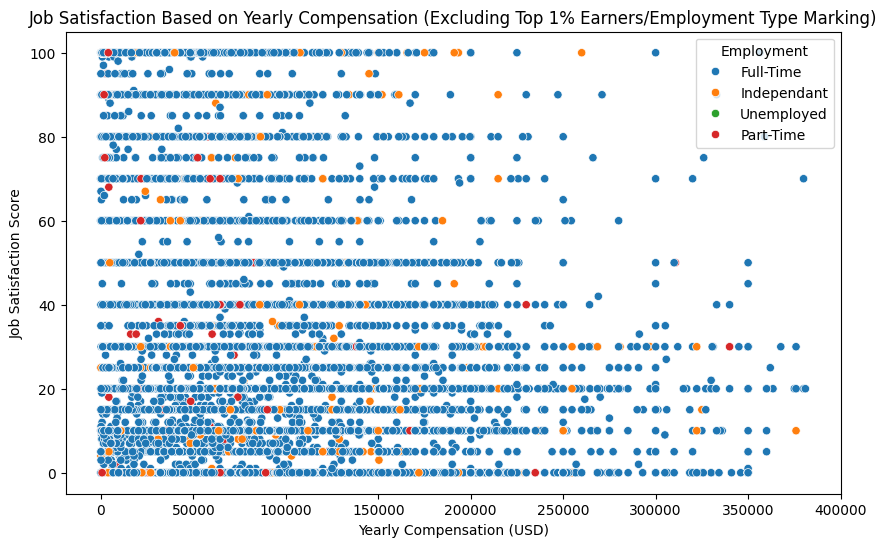

In [10]:
## Write your code here
# Pulling Data
query = '''
SELECT ConvertedCompYearly, JobSatPoints_6, Employment
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
AND Employment NOT LIKE '%;%'
'''
df = pd.read_sql_query(query, conn)

# Mappings
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Cleaning Data
df.loc[: ,'Employment']= df['Employment'].map(mapping_employment)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]


# Plotting Data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment')
plt.title('Job Satisfaction Based on Yearly Compensation (Excluding Top 1% Earners/Employment Type Marking)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


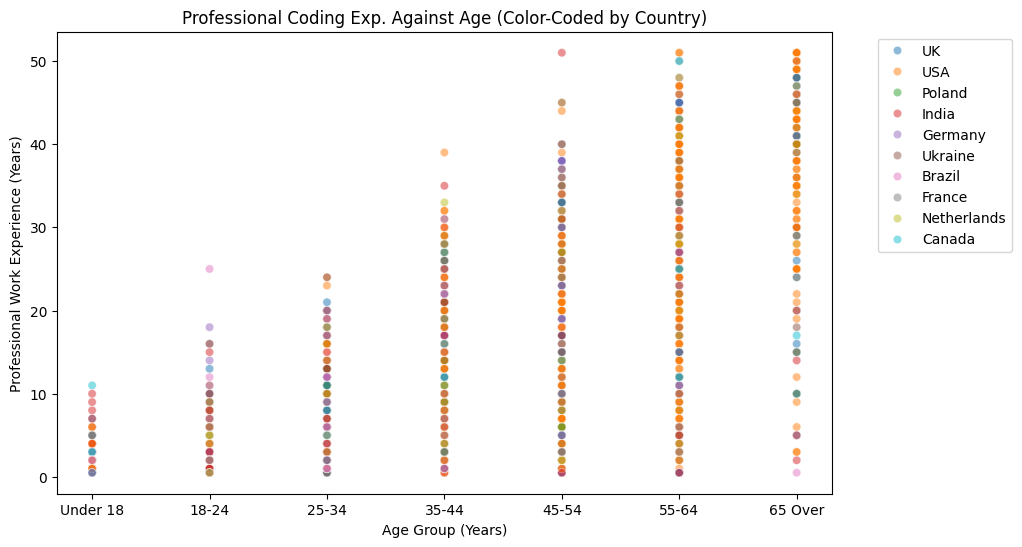

In [11]:
## Write your code here
# Pulling Data
query = '''
SELECT YearsCodePro, Age, Country
FROM main
WHERE YearsCodePro IS NOT NULL
AND Age IS NOT NULL
AND Country IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Mapping
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
}
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Cleaning Data
top10_countries = df['Country'].value_counts().head(10).index
df_filtered = df[df['Country'].isin(top10_countries)].copy()
df_filtered['Country'] = df_filtered['Country'].replace(mapping_country)
df_filtered['Age'] = df_filtered['Age'].map(mapping_age_group)
df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].astype(str)
df_filtered['YearsCodePro'] = df_filtered['YearsCodePro'].replace(mapping_codeyears)
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')
df_filtered.dropna(subset=['Age'], inplace=True)

age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_groups, ordered=True)

# Plotting Data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtered, x='Age', y='YearsCodePro',
                hue='Country', alpha=0.5)
plt.title('Professional Coding Exp. Against Age (Color-Coded by Country)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Professional Work Experience (Years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=range(len(age_groups)), labels=age_groups)
plt.show()

In [12]:
# Final step is closing the DB connection
conn.close()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
